In [1]:
import pandas as pd
#path='C:/Users/dell/OneDrive/Desktop/rupesh/CBIT/WorkShop/21-06-2021/Rupesh Mishra/Car_price_prediction/data\car_data.csv'
path = r"C:\Users\chinky\Desktop\nlp\verify_tf_df_adv.csv"

df = pd.read_csv(path)

In [2]:
df.head(10)

,Unnamed: 0,title,paper_id
0,0,a systematic review and meta-analysis of the e...,b7a6a987030c52cc7ecdf49c3933b6cfda488210
1,1,NaN,28223ad437aa22ac2285bd9dd775e1415a69411a
2,2,citation expression pattern analysis of antiv...,b6c38211730ff7826aa6a52aff9e3be848f8e738
3,3,the middle east respiratory syndrome coronavir...,e6a9266f1f45099b19b5c4f3a4cf62de41786e54
4,4,the ebola virus disease outbreak in west afric...,e788ce631ca8a7d0a0d0b48dfd06d343de282972
5,5,more and more coronaviruses human coronavirus...,27b4bbbc97d4660bbfef9e12bf3c3b9790df9014
6,6,prevalence of cryptosporidia eimeria giardia...,9ce0da57763dfa3cebfb1463093ff0bba3333a25
7,7,phellodendron chinense schneid a novel yellow...,9740b9f6f49dc554d7be515871bd31123bda5473
8,8,open peer review discuss this article comment...,f291cfbcb64f14deb49a2dcc95079a17e838cf85
9,9,r e v i e w open access advances in prevention...,6b1560c20661e5dea1c1d2c391c1fa68f6cf83ca


In [3]:
df.tail(10)

,Unnamed: 0,title,paper_id
59301,59301,detection of rickettsial dna in ticks and wild...,PMC4347921
59302,59302,better understanding on mers corona virus outb...,PMC4479933
59303,59303,nepal’s first case of covid-19 and public heal...,PMC7107523
59304,59304,phenobarbital-induced anticonvulsant hypersens...,PMC6943318
59305,59305,clathrin-dependent localization of alpha 1 3 m...,PMC2120240
59306,59306,balkan endemic nephropathy—current status and ...,PMC4400492
59307,59307,a golgi retention signal in a membrane-spannin...,PMC2289920
59308,59308,simultaneous detection of eleven sexually tran...,PMC6717854
59309,59309,the epidemiology of hand foot and mouth disea...,PMC5130063
59310,59310,community-acquired pseudomonas aeruginosa-pneu...,PMC5444396


In [4]:
df.shape

(59311, 3)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59311 entries, 0 to 59310
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  59311 non-null  int64 
 1   title       54989 non-null  object
 2   paper_id    59311 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.4+ MB


In [6]:
df.describe()

,Unnamed: 0
count,59311.000000
mean,29655.000000
std,17121.755245
min,0.000000
25%,14827.500000
50%,29655.000000
75%,44482.500000
max,59310.000000


In [7]:
df.isnull().sum()

Unnamed: 0       0
title         4322
paper_id         0
dtype: int64

In [8]:
df.dropna(inplace=True)

In [9]:
df.isnull().sum()

Unnamed: 0    0
title         0
paper_id      0
dtype: int64

In [10]:
df.columns

Index(['Unnamed: 0', 'title', 'paper_id'], dtype='object')

In [11]:
!pip install nltk

In [12]:
!pip install scikit-learn

In [13]:
import pandas as pd
import re
import nltk
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'text_column' is the name of the column containing text data
text_data = df['title']

# Tokenization (with handling non-string values)
tokenized_text = text_data.apply(lambda x: word_tokenize(str(x)) if isinstance(x, str) else [])
print(tokenized_text)



[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\chinky\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\chinky\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\chinky\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


0        [a, systematic, review, and, meta-analysis, of...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathy—current, status,...
59307    [a, golgi, retention, signal, in, a, membrane-...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [community-acquired, pseudomonas, aeruginosa-p...
Name: title, Length: 54989, dtype: object


In [14]:
lowercased_text = tokenized_text.apply(lambda x: [word.lower() for word in x])
print(lowercased_text)

0        [a, systematic, review, and, meta-analysis, of...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathy—current, status,...
59307    [a, golgi, retention, signal, in, a, membrane-...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [community-acquired, pseudomonas, aeruginosa-p...
Name: title, Length: 54989, dtype: object


In [15]:
def remove_special_characters(tokens):
    return [re.sub(r'[^a-zA-Z0-9\s]', '', token) for token in tokens]

cleaned_text = lowercased_text.apply(remove_special_characters)
print(cleaned_text)

0        [a, systematic, review, and, metaanalysis, of,...
2        [citation, expression, pattern, analysis, of, ...
3        [the, middle, east, respiratory, syndrome, cor...
4        [the, ebola, virus, disease, outbreak, in, wes...
5        [more, and, more, coronaviruses, human, corona...
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [a, golgi, retention, signal, in, a, membranes...
59308    [simultaneous, detection, of, eleven, sexually...
59309    [the, epidemiology, of, hand, foot, and, mouth...
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [16]:
# Removing stop words
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
filtered_text = cleaned_text.apply(lambda x: [word for word in x if word not in stop_words])
print(filtered_text)

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\chinky\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        [systematic, review, metaanalysis, epidemiolog...
2        [citation, expression, pattern, analysis, anti...
3        [middle, east, respiratory, syndrome, coronavi...
4        [ebola, virus, disease, outbreak, west, africa...
5                [coronaviruses, human, coronavirus, hku1]
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [golgi, retention, signal, membranespanning, d...
59308    [simultaneous, detection, eleven, sexually, tr...
59309     [epidemiology, hand, foot, mouth, disease, asia]
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [17]:
# Stemming or Lemmatization
stemmer = PorterStemmer()
lemmatizer = WordNetLemmatizer()

stemmed_text = filtered_text.apply(lambda x: [stemmer.stem(word) for word in x])
lemmatized_text = filtered_text.apply(lambda x: [lemmatizer.lemmatize(word) for word in x])
print(lemmatized_text)

0        [systematic, review, metaanalysis, epidemiolog...
2        [citation, expression, pattern, analysis, anti...
3        [middle, east, respiratory, syndrome, coronavi...
4        [ebola, virus, disease, outbreak, west, africa...
5                [coronaviruses, human, coronavirus, hku1]
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [golgi, retention, signal, membranespanning, d...
59308    [simultaneous, detection, eleven, sexually, tr...
59309     [epidemiology, hand, foot, mouth, disease, asia]
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [18]:
# Handling numbers
def remove_numbers(tokens):
    return [token for token in tokens if not token.isdigit()]

processed_text_no_numbers= filtered_text.apply(remove_numbers)
print(processed_text_no_numbers)

0        [systematic, review, metaanalysis, epidemiolog...
2        [citation, expression, pattern, analysis, anti...
3        [middle, east, respiratory, syndrome, coronavi...
4        [ebola, virus, disease, outbreak, west, africa...
5                [coronaviruses, human, coronavirus, hku1]
                               ...                        
59306    [balkan, endemic, nephropathycurrent, status, ...
59307    [golgi, retention, signal, membranespanning, d...
59308    [simultaneous, detection, eleven, sexually, tr...
59309     [epidemiology, hand, foot, mouth, disease, asia]
59310    [communityacquired, pseudomonas, aeruginosapne...
Name: title, Length: 54989, dtype: object


In [19]:
# Removing rare or infrequent words
def remove_rare_words(tokens, min_frequency=2):
    word_counts = nltk.FreqDist(tokens)
    return [token for token in tokens if word_counts[token] >= min_frequency]

processed_text_no_rare_words = processed_text_no_numbers.apply(remove_rare_words)
print(processed_text_no_rare_words)

0        [pathogenic, coli, calves, calves, pathogenic,...
2                                                       []
3                                                       []
4                                                       []
5                                                       []
                               ...                        
59306                                                   []
59307                                                   []
59308                                                   []
59309                                                   []
59310                                                   []
Name: title, Length: 54989, dtype: object


In [20]:
# Word frequency filtering
def filter_word_frequency(tokens, min_frequency=2, max_frequency=100):
    word_counts = nltk.FreqDist(tokens)
    return [token for token in tokens if min_frequency <= word_counts[token] <= max_frequency]

processed_text_filtered = processed_text_no_rare_words.apply(filter_word_frequency)
print(processed_text_filtered)

0        [pathogenic, coli, calves, calves, pathogenic,...
2                                                       []
3                                                       []
4                                                       []
5                                                       []
                               ...                        
59306                                                   []
59307                                                   []
59308                                                   []
59309                                                   []
59310                                                   []
Name: title, Length: 54989, dtype: object


In [21]:
!pip install wordcloud

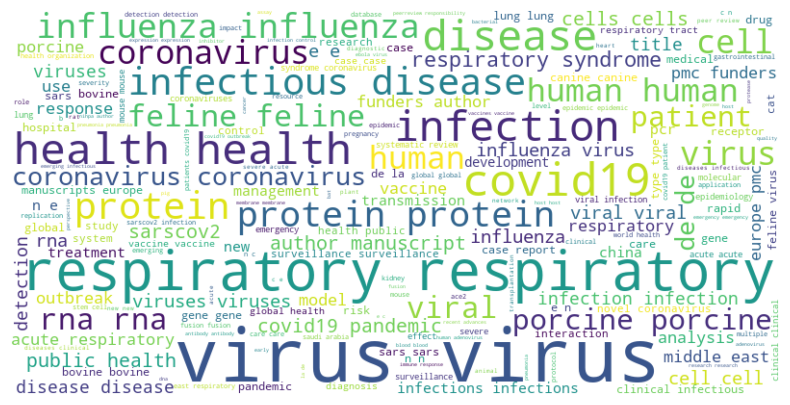

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Combine all tokens into a single list
all_tokens = [token for tokens_list in processed_text_filtered for token in tokens_list]

# Join all tokens into a single string
all_tokens_text = ' '.join(all_tokens)

# Generate the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_tokens_text)

# Display the word cloud using matplotlib
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


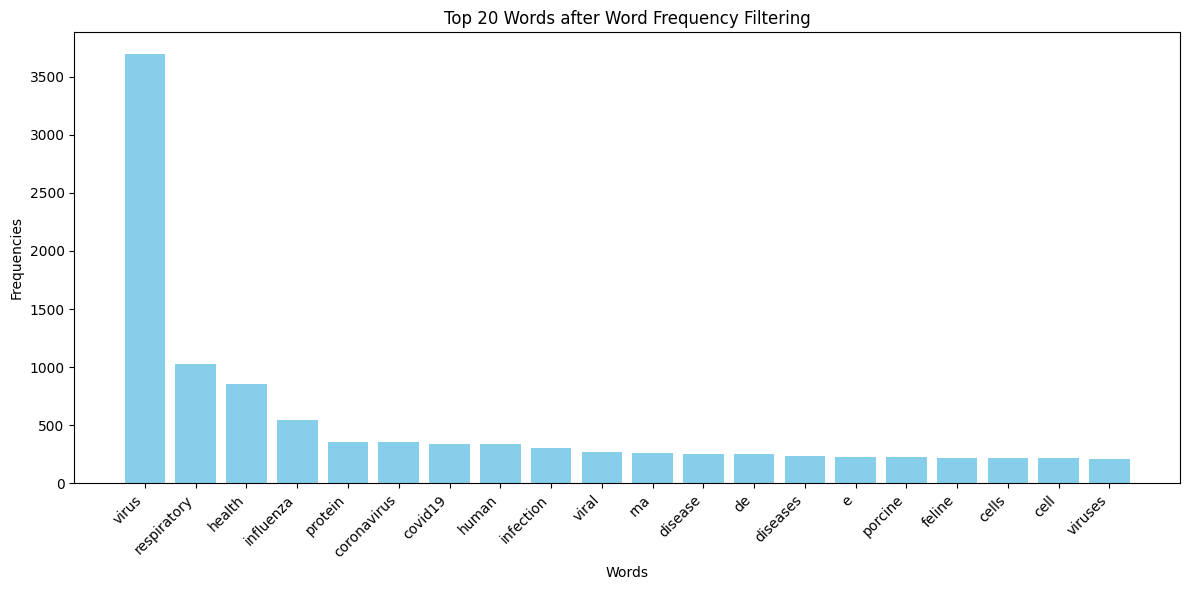

In [25]:
import matplotlib.pyplot as plt
import nltk

# Combine all tokens into a single list
all_tokens = [token for tokens_list in processed_text_filtered for token in tokens_list]

# Calculate word frequencies
word_counts = nltk.FreqDist(all_tokens)

# Sort word frequencies in descending order
sorted_word_counts = sorted(word_counts.items(), key=lambda x: x[1], reverse=True)

# Extract top N words and their frequencies for plotting
top_n = 21  # Adjust this value as needed
top_words = [word[0] for word in sorted_word_counts[:top_n]]
top_frequencies = [word[1] for word in sorted_word_counts[:top_n]]

# Remove empty string from top_words list
top_words = [word for word in top_words if word]

# Ensure that top_frequencies has the same length as top_words
top_frequencies = top_frequencies[:len(top_words)]

# Create bar chart with adjusted plot size, rotation angle, and font size
plt.figure(figsize=(12, 6))  # Increase the width of the plot
plt.bar(top_words, top_frequencies, color='skyblue')
plt.xlabel('Words', fontsize=10)  # Adjust the font size of the x-axis labels
plt.ylabel('Frequencies')
plt.title('Top {} Words after Word Frequency Filtering'.format(len(top_words)))  # Update the title
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [31]:
!pip install squarify

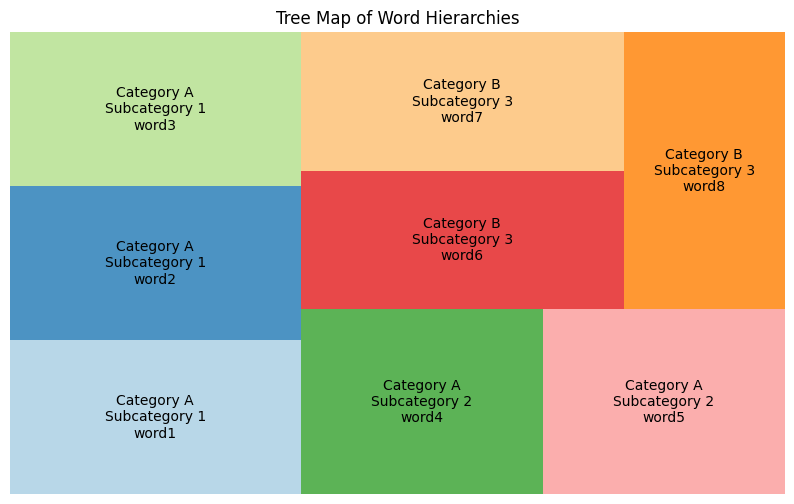

In [32]:
import matplotlib.pyplot as plt
import squarify

# Example data (replace with your own data)
labels = ['health', 'virus', 'respiratory', 'disease', 'covid19', 'coronavirus', 'infection', 'viral']
sizes = [100, 80, 70, 60, 50, 40, 30, 20]

# Create the tree map
plt.figure(figsize=(10, 6))
squarify.plot(sizes=sizes, label=labels, alpha=0.7)

# Add labels
plt.title('Tree Map of Word Hierarchy')
plt.axis('off')  # Hide axis
plt.show()


In [33]:
# Part-of-speech tagging
pos_tagged_text = filtered_text.apply(nltk.pos_tag)
print(pos_tagged_text)

0        [(systematic, JJ), (review, NN), (metaanalysis...
2        [(citation, NN), (expression, NN), (pattern, N...
3        [(middle, JJ), (east, JJ), (respiratory, NN), ...
4        [(ebola, NN), (virus, NN), (disease, NN), (out...
5        [(coronaviruses, NNS), (human, JJ), (coronavir...
                               ...                        
59306    [(balkan, JJ), (endemic, JJ), (nephropathycurr...
59307    [(golgi, JJ), (retention, NN), (signal, NN), (...
59308    [(simultaneous, JJ), (detection, NN), (eleven,...
59309    [(epidemiology, NN), (hand, NN), (foot, NN), (...
59310    [(communityacquired, VBN), (pseudomonas, NNS),...
Name: title, Length: 54989, dtype: object


In [34]:
# Vectorization (using CountVectorizer as an example)
vectorizer = CountVectorizer()
vectorized_text = vectorizer.fit_transform(processed_text_filtered.apply(lambda x: ' '.join(x)))

# Displaying the vectorized text
print(vectorized_text)

  (0, 2303)	2
  (0, 600)	2
  (0, 419)	2
  (8, 3142)	2
  (14, 3278)	2
  (26, 1588)	2
  (28, 1495)	2
  (42, 2204)	2
  (42, 1369)	2
  (42, 3485)	2
  (56, 3409)	2
  (58, 516)	2
  (58, 3166)	2
  (60, 2777)	2
  (67, 1275)	2
  (67, 167)	2
  (78, 535)	2
  (79, 2798)	2
  (79, 698)	2
  (85, 987)	2
  (85, 1199)	2
  (100, 424)	2
  (111, 1297)	2
  (114, 375)	2
  (117, 2418)	2
  :	:
  (54783, 2324)	2
  (54788, 2704)	2
  (54798, 3398)	2
  (54799, 1637)	2
  (54806, 996)	2
  (54807, 3331)	2
  (54817, 2704)	2
  (54818, 3398)	2
  (54824, 3069)	2
  (54833, 174)	2
  (54845, 3398)	2
  (54850, 3069)	2
  (54863, 2704)	2
  (54870, 3398)	2
  (54870, 1164)	2
  (54886, 3398)	3
  (54902, 2965)	2
  (54941, 2402)	2
  (54943, 2704)	2
  (54953, 3387)	2
  (54961, 2746)	2
  (54961, 1137)	2
  (54963, 2704)	2
  (54966, 1574)	2
  (54972, 871)	2


In [35]:
from sklearn.decomposition import LatentDirichletAllocation

# Initialize LDA model
lda_model = LatentDirichletAllocation(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the LDA model to the vectorized text data
lda_model.fit(vectorized_text)

# Print the topics generated by the LDA model
def print_topics(model, vectorizer, n_top_words):
    words = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Specify the number of top words to display for each topic
n_top_words = 10

# Print the top words for each topic
print_topics(lda_model, vectorizer, n_top_words)


Topic #1:
diseases infectious care type emerging management outbreak clinical covid19 immune

Topic #2:
virus infection feline swine rotavirus cancer control genes domain disorders

Topic #3:
sars bovine review new medicine antibody medical report hospital risk

Topic #4:
influenza vaccine mouse research receptor east middle fusion proteins author

Topic #5:
cells clinical surveillance title emergency study analysis expression pneumonia membrane

Topic #6:
health coronavirus human disease viruses public ebola global world treatment

Topic #7:
respiratory viral covid19 acute syndrome canine pandemic patients epidemic china

Topic #8:
protein porcine cell infections global covid19 development response structure management

Topic #9:
rna de gene la vaccines dna molecular cdc pcr dogs

Topic #10:
lung case detection bat transmission zika production crystallization acid therapy



In [37]:
!pip install gensim

   ---------------------------------------- 24.0/24.0 MB 1.3 MB/s eta 0:00:00
   ---------------------------------------- 61.2/61.2 kB 90.5 kB/s eta 0:00:00


In [38]:
from gensim.corpora.dictionary import Dictionary
from gensim.models.ldamodel import LdaModel
from gensim.models import CoherenceModel

# Assuming 'processed_text_filtered' is your pre-processed text data after filtering

# Create a dictionary mapping index to word
id2word = Dictionary(processed_text_filtered)

# Convert the pre-processed text to bag-of-words format
corpus = [id2word.doc2bow(text) for text in processed_text_filtered]

# Build an LDA model
lda_model = LdaModel(corpus=corpus, id2word=id2word, num_topics=10, random_state=42)

# Build a coherence model using UMass coherence
coherence_model_lda = CoherenceModel(model=lda_model, texts=processed_text_filtered, dictionary=id2word, coherence='u_mass')

# Calculate coherence score
coherence_score = coherence_model_lda.get_coherence()

print("UMass Coherence Score:", coherence_score)


UMass Coherence Score: -17.572107334616682


In [39]:
# Assuming 'corpus' is your bag-of-words corpus
# Assuming 'lda_model' is your trained LDA model

# Calculate perplexity
perplexity = lda_model.log_perplexity(corpus)

print("Perplexity:", perplexity)


Perplexity: -8.00804602800043


In [40]:
import numpy as np

def calculate_topic_stability(coherence_score):
    mean_coherence = np.mean(coherence_score)
    std_coherence = np.std(coherence_score)
    return mean_coherence, std_coherence

# Assuming 'coherence_scores' is a list containing coherence scores from different runs
mean_coherence, std_coherence = calculate_topic_stability(coherence_score)
print("Mean Coherence:", mean_coherence)
print("Standard Deviation of Coherence:", std_coherence)


Mean Coherence: -17.572107334616682
Standard Deviation of Coherence: 0.0


In [41]:
from sklearn.decomposition import NMF

# Assuming 'vectorized_text' is the vectorized text data using CountVectorizer

# Initialize NMF model
nmf_model = NMF(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the NMF model to the vectorized text data
nmf_model.fit(vectorized_text)

# Print the topics generated by the NMF model
def print_nmf_topics(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Specify the number of top words to display for each topic
n_top_words = 10

# Print the top words for each topic
print_nmf_topics(nmf_model, vectorizer, n_top_words)


Topic #1:
europe pmc funders author manuscripts manuscript nihpa cells translation proteins

Topic #2:
virus rna gene protein mosaic silencing infection detection viral feline

Topic #3:
respiratory syndrome acute infections middle east management infection viral tract

Topic #4:
health public organization world international conference management office global information

Topic #5:
de la espaola sociedad geritrica cardiologa coronavirus conjunto emergencia documento

Topic #6:
cdc provincial district municipal detection pcr swine realtime reverse siv

Topic #7:
diseases infectious disease emerging clinical viral infections foodborne review pathogens

Topic #8:
covid19 pandemic patients care management infection clinical case outbreak sarscov2

Topic #9:
human coronavirus protein cells infection cell humanized adenovirus immune mice

Topic #10:
influenza cells ovalbumin viruses airway ige sensitization detection viral inoculation



In [42]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import silhouette_score

# Convert text data to a matrix of token counts
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(processed_text_filtered.apply(lambda x: ' '.join(x)))

# Initialize NMF model
nmf_model = NMF(n_components=10, random_state=42)  # Adjust the number of topics as needed

# Fit the model to the data
nmf_model.fit(X)

# Extract the topics
topics = nmf_model.components_

# Calculate silhouette score (a measure of how similar an object is to its own cluster compared to other clusters)
silhouette_avg = silhouette_score(X, nmf_model.transform(X).argmax(axis=1))
print("Silhouette Score:", silhouette_avg)


Silhouette Score: 0.8455136713639728


In [43]:
from sklearn.decomposition import NMF
from sklearn.feature_extraction.text import CountVectorizer

# Calculate the reconstruction error
reconstruction_error = nmf_model.reconstruction_err_

print("Reconstruction Error:", reconstruction_error)


Reconstruction Error: 242.01738593168378


In [44]:
from sklearn.decomposition import TruncatedSVD
from sklearn.feature_extraction.text import CountVectorizer
import pandas as pd


# Initialize LSA model
lsa_model = TruncatedSVD(n_components=10, random_state=42)  # You can adjust the number of topics (n_components) as needed

# Fit the LSA model to the vectorized text data
lsa_model.fit(vectorized_text)

# Print the topics generated by the LSA model
def print_lsa_topics(model, vectorizer, n_top_words):
    feature_names = vectorizer.get_feature_names_out()
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic #{topic_idx + 1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-n_top_words - 1:-1]]))
        print()

# Specify the number of top words to display for each topic
n_top_words = 10

# Print the top words for each topic
print_lsa_topics(lsa_model, vectorizer, n_top_words)


Topic #1:
europe pmc funders author manuscripts manuscript nihpa cells translation covid19

Topic #2:
virus respiratory influenza viral protein rna infection gene detection viruses

Topic #3:
respiratory syndrome acute infections infection middle east management coronavirus viral

Topic #4:
health public organization world international management conference covid19 care information

Topic #5:
de la coronavirus sociedad espaola geritrica cardiologa covid19 seccin emergencia

Topic #6:
cdc provincial district municipal influenza detection pcr swine reverse realtime

Topic #7:
diseases covid19 infectious disease clinical viral emerging infection pandemic patients

Topic #8:
diseases infectious emerging de viral disease infections foodborne health pathogens

Topic #9:
influenza human coronavirus cells protein viral viruses cell mice ovalbumin

Topic #10:
influenza covid19 ovalbumin airway care ige sensitization de clinical inoculation



In [51]:
transformed_data = lsa_model.transform(vectorized_text)
reconstructed_data = lsa_model.inverse_transform(transformed_data)
reconstruction_error = np.linalg.norm(vectorized_text - reconstructed_data)
print("Reconstruction Error:", reconstruction_error)

Reconstruction Error: 241.9548131910658
